In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_pickle('train.pkl')

In [3]:
print("Engineering Features")

Engineering Features


In [4]:
print("What are the total number of players in each game? Big vs Small games")

What are the total number of players in each game? Big vs Small games


In [5]:
df['players_in_match'] = df.groupby('matchId')['matchId'].transform('count')

In [6]:
df.players_in_match.min()

2

In [7]:
df.players_in_match.max()

100

In [8]:
df.players_in_match.mean()

94.1948130916254

/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


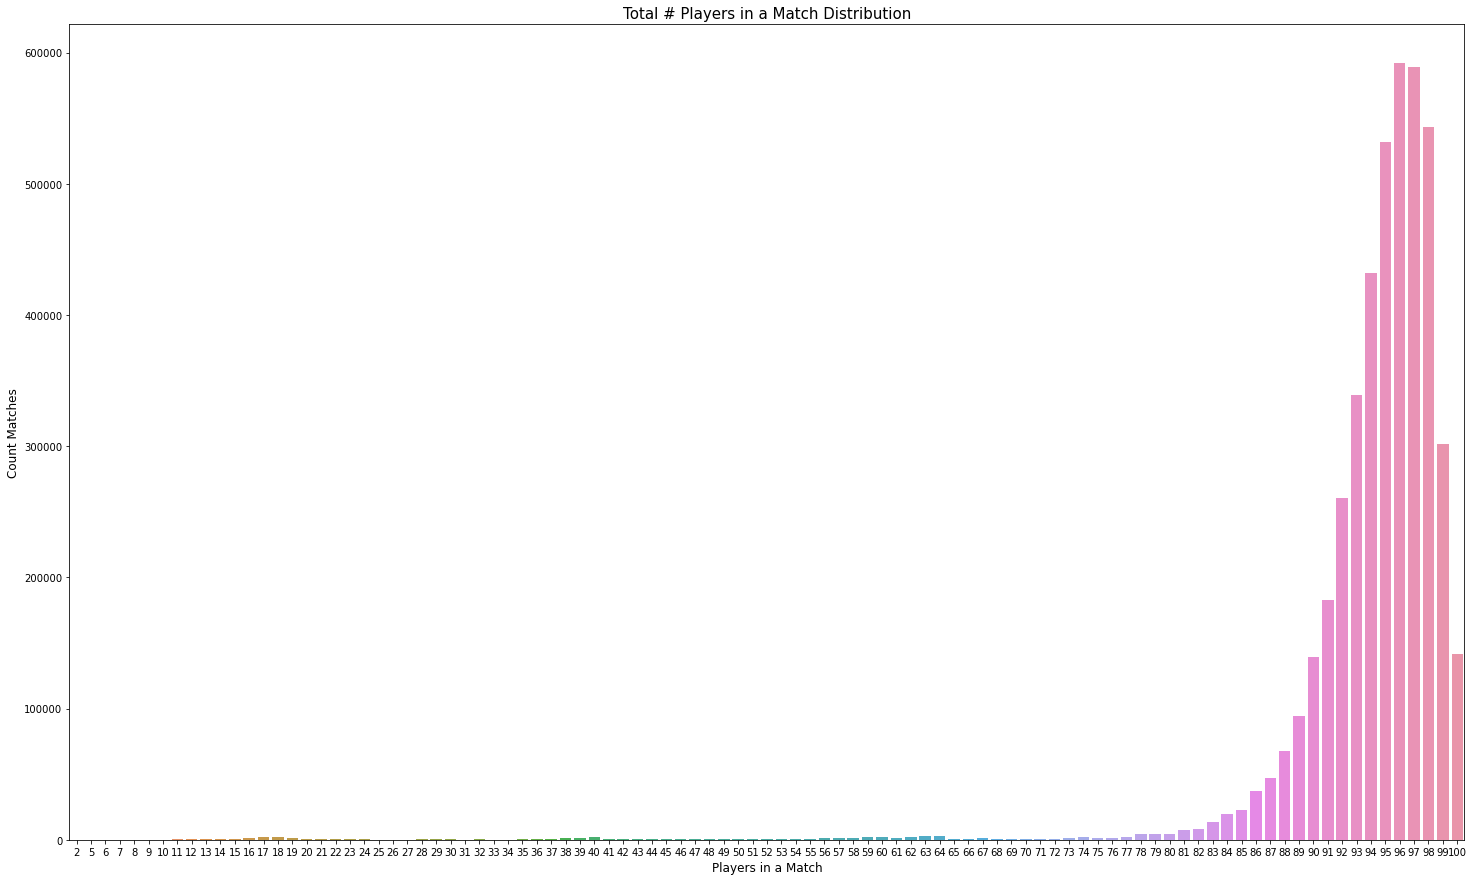

In [9]:
plt.figure(figsize=(25,15))
sns.countplot(df['players_in_match'])
plt.title("Total # Players in a Match Distribution",fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Count Matches', fontsize='large')
plt.xlabel('Players in a Match', fontsize='large')
plt.savefig('player_distribution.png')
plt.show()

In [10]:
print("Was this a custom lobby?")
df[df.players_in_match < 5]

Was this a custom lobby?


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players_in_match
1206365,28f2bb56074e95,311a5a9adf1a96,e5a77433bc436f,0,0,100.00,0,1,0,1,0,1,1,0.00,133,normal-solo-fpp,2,2,1500,0,0.00,0,0.00,0,0,0.28,2,0,1.00,2
2109739,2a5f4f18fe9e86,f290930a32548a,e5a77433bc436f,0,0,0.00,0,0,0,2,0,0,0,0.00,133,normal-solo-fpp,2,2,1500,0,0.00,0,0.00,0,0,0.00,2,0,0.00,2


In [11]:
print("Are these custom lobbies?")
df[df.players_in_match < 11]

Are these custom lobbies?


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players_in_match
5479,875a95c6a48744,47f6d77a0582b3,e263f4a227313a,3,0,745.70,3,2,10,3,1000,7,2,29.90,887,normal-duo-fpp,6,6,-1,0,0.00,0,0.00,0,0,528.70,16,1500,0.40,8
6632,6ab29688a68902,398e7519c03ea8,4ed32be2abeae8,0,2,85.67,0,0,7,3,0,1,1,4.51,314,normal-solo-fpp,10,10,1500,0,0.00,0,0.00,0,0,187.10,1,0,0.78,10
14542,3933e63a8af092,c61a92782a1e26,05b0db99545118,0,2,0.00,0,0,1,4,0,0,0,0.00,1061,normal-solo-fpp,10,9,1500,0,0.00,0,0.00,0,0,2788.00,4,0,0.89,10
16111,485e1a3e04b1d2,ab4f756ceedb8d,93513672bce7d5,0,3,5.75,0,0,1,6,1000,0,0,0.00,1059,normal-solo-fpp,8,8,-1,0,1040.00,0,52.48,0,0,1004.00,5,1500,0.43,8
20181,311bbc2d003b4e,40e212e6ac9cfc,05b0db99545118,0,0,0.00,0,0,0,8,0,0,0,0.00,1061,normal-solo-fpp,10,9,1500,0,0.00,0,0.00,0,0,103.10,1,0,0.22,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4385746,70fe2765407b27,c5025cd87d327f,2f24ef22e0383c,0,1,177.20,0,1,3,2,0,2,1,14.06,312,normal-solo-fpp,9,9,1500,0,0.00,0,0.00,0,0,192.50,4,0,0.88,9
4386293,22dda9b66f2f4d,56490bbe9f559f,4fbe7d6c5f6537,2,3,911.40,0,2,12,3,1000,7,2,150.10,899,normal-solo-fpp,9,6,-1,0,0.00,0,0.00,0,0,200.60,10,1500,0.75,9
4394823,a34af28c3803cc,9ee5af5bd13e6c,f0824159ddaa72,0,0,100.00,1,0,0,7,0,0,0,0.00,948,normal-duo-fpp,4,4,1500,0,0.00,0,0.00,0,0,402.00,2,0,0.00,8
4410353,e0df7cd963706f,fa8d99ee08654a,cba97f92945435,0,0,0.00,0,0,0,8,0,0,0,0.00,656,normal-solo-fpp,10,10,1500,0,610.70,0,0.00,0,0,316.50,3,0,0.22,10


In [12]:
df[df.players_in_match < 11].matchType.unique()

array(['normal-duo-fpp', 'normal-solo-fpp', 'normal-squad-fpp',
       'normal-duo', 'squad-fpp', 'normal-solo', 'duo-fpp', 'solo-fpp'],
      dtype=object)

In [13]:
print("Total number of matches with 10 or less players")
df[df.players_in_match < 11].matchId.unique().shape

Total number of matches with 10 or less players


(75,)

In [14]:
print("Let's add up distance columns, and items acquired")

Let's add up distance columns, and items acquired


In [15]:
# df['heals_and_boosts'] = df['heals']+df['boosts']
df['total_distance'] = df['walkDistance']+df['rideDistance']+df['swimDistance']
df['total_items_acquired'] = df['heals']+df['boosts']+df['weaponsAcquired']

In [16]:
print("Let's get some accuracy and efficiency features going")

Let's get some accuracy and efficiency features going


In [17]:
df['headshot_to_kill'] = df['headshotKills'] / df['kills']
df['total_distance_per_kill'] = df['total_distance'] / df['kills']
df['total_items_per_kill'] = df['total_items_acquired'] / df['kills']

In [18]:
df['damage_per_distance'] = df.damageDealt/df.total_distance

In [19]:
print("Leveraging kill place and max place to differentiate good from bad players")

Leveraging kill place and max place to differentiate good from bad players


In [20]:
df['killplace_to_maxPlace'] = df['killPlace'] / df['maxPlace']

In [21]:
print("convert categorical features to numeric")

convert categorical features to numeric


In [22]:
label_encoder =LabelEncoder()
df['matchType_encoded']= label_encoder.fit_transform(df['matchType'])
df['matchType_encoded']

0          15
1          15
2           2
3          15
4          13
           ..
4446961    15
4446962    12
4446963    15
4446964    15
4446965    13
Name: matchType_encoded, Length: 4446965, dtype: int64

In [23]:
print("Let's get some duo and squad features going")

Let's get some duo and squad features going


In [ ]:
df = df.assign(team_size = df.groupby('groupId').groupId.transform('count'))
df = df.assign(max_team_size_lobby = df.groupby('matchId').team_size.transform('max'))
df = df.assign(lobby_size = df.groupby('matchId').Id.transform('nunique'))

In [ ]:
print("Let's get max number of kills possible to win game in a lobby")

In [ ]:
df['max_possible_kills'] = df.lobby_size - df.team_size

In [ ]:
print("Max number of kills, and total damage, kills, kill points, and items acquired on team")
df['max_kill_team'] = df.groupby('groupId').kills.transform('max')
df['total_team_damage'] = df.groupby('groupId').damageDealt.transform('sum')
df['total_team_kills'] =  df.groupby('groupId').kills.transform('sum')
df['total_team_items'] = df.groupby('groupId').total_items_acquired.transform('sum')
df['total_team_distance'] = df.groupby('groupId').total_distance.transform('sum')
df['team_kill_points'] = df.groupby('groupId').killPoints.transform('sum')

In [ ]:
print("Let's get some match features going")

In [ ]:
print("Total number of kills and distance, and max kill in a match")
df['max_kills_match'] = df.groupby('matchId').kills.transform('max')
df['total_kills_match'] = df.groupby('matchId').kills.transform('sum')
df['total_distance_match'] = df.groupby('matchId').total_distance.transform('sum')

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
train = df.drop(columns=['Id','groupId','matchId','matchType'] ,axis=1)

In [ ]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
train.fillna(0, inplace=True)

In [ ]:
train.to_pickle('feature_train.pkl')

In [ ]:
f,ax = plt.subplots(figsize=(20, 20))
cols = train.corr()['winPlacePerc'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
k = 15 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = train.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.savefig('heatmap_engineered.png')
plt.show()